In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import scipy.linalg as sla

<div class="alert alert-info">

<h1>Example 1: Numerical model for vibration in bridges</h1>
    
  <img src="eigenvalue_vibrating_bridge_tacoma.jpg"
  style="width: 50%; float:right;margin-left:4em; clear:both;">
  <p>
      <strong>Eigenvalues and eigenvectors</strong> are important in Civil Engineering.
    All structures, from buildings to bridges, have <em>natural frequencies</em> of vibration.
    If external forces, like wind or earthquakes, provide energy to one of these natural frequencies at a
    rate faster than that with which damping dissipates it, vibrations with large amplitudes can occur. </p>
   <p> This is a phenomenon called <em>resonance</em> and it can be modeled as an eigenvalue problem.
    For some things (like guitar strings), that is desired.
    For some others (such as a <a href="https://youtu.be/ACKMPD6MySs" target="_blank">tall building</a>,
    or an <a href="https://en.wikipedia.org/wiki/Lockheed_L-188_Electra#Operational_history" target="_blank">airplane</a>,
    or a bridge), this is less desirable.</p>   
  <p>
    The collapse of the
    <a href="https://en.wikipedia.org/wiki/Tacoma_Narrows_Bridge_(1940)" target="_blank">Tacoma Narrows Bridge</a>,
    pictured at the right, is a striking example of resonance.
    (It is actually a bit more complicated than that and is an example of a phenomenon called
    <a href="https://en.wikipedia.org/wiki/Aeroelasticity#Flutter" target="_blank">aeroelastic flutter</a>).
    Fortunately, the resulting math is
    fairly similar when modeled as resonance. To illustrate the problem, Wikipedia has some
    <a href="https://commons.wikimedia.org/wiki/File:Tacoma_Narrows_Bridge_destruction.ogg" target="_blank">footage</a>
    of the oscillations and the ensuing collapse and, if you're into that type of thing, a
    <a href="https://commons.wikimedia.org/wiki/File:Tacoma_Bridge_Animation.ogv" target="_blank">numerical simulation</a>.
  </p>
</div>


## 1.1) Simple model: unsupported bridge (no pillars)

The unsupported bridge model consists of $N$ small masses $m_i$ connected by springs, as illustrated below:

<img src="Bridge_Undeformed.png" width=900></img>

We will assume each mass $m_i$ will experience only transverse (vertical) displacements $y_i$ (i.e., we will neglect any longitudinal displacements). For our model, we will use `N = 200`. Consider the diagram below, where we look at a subset of masses, to help us writing the equations of motion for each mass $m_i$:

<img src="Bridge_Deformed.png" width=600></img>



Recall from your physics class that a spring force is defined as $F = -k \Delta L$, where $k$ is the spring stiffness (modeling the stiffness of the bridge) and $\Delta L$ is the spring change in length when subject to the force $F$. Since here we are neglecting the longitudinal changes $\Delta x$, we can write the following equation for the equation of motion:

$$ m y''_i  -k(y_{i+1} - y_i) + k(y_i - y_{i-1}) = 0 $$

where we are assuming that all masses have the same value ($m_i = m$ for all $i$). We can re-arrange the equation above to obtain:

$$  \frac{m}{k} y''_i  + (2\,y_i - y_{i+1} - y_{i-1}) = 0 $$

We assume that the solution for this ODE (this is the harmonic oscillator that we introduced in the last group activity!) is given by:

$$ y(t) = A \cos(wt) $$

which gives $y''(t) = - w^2 A \cos(wt) = -w^2 y(t)$. When we substitute this into the equation of motion, we get:

$$ - \frac{m}{k} w^2 y_i  + (2\,y_i - y_{i+1} - y_{i-1}) = 0 $$

We will explore more this equation. We need to solve this for all masses! You should recognize now that this system of linear equations can be written in a matrix form. We will define the variable

$$\lambda = \frac{m}{k} w^2$$

and write the system of linear equations:

  <p>
    $\lambda y_i =
    \begin{cases}
    2y_i - y_{i+1} & \text{ for } i=0,\\
    2y_{i} - y_{i-1} - y_{i+1}& \text{ for } i=1,2,...,N-2,\\
    2y_{i} - y_{i-1} & \text{ for } i=N-1.
    \end{cases}$
  </p>

and in matrix form

$$ \lambda {\bf y} ={\bf A}{\bf y} $$

where $(\lambda,{\bf y})$ are the eigenpairs for the matrix ${\bf A}$, which you know how to solve! 



#### Let's start with a small example

We will assume `N = 4` to construct the matrix ${\bf A_4}$ of shape (4, 4), such that 

$$
{\bf A_4} {\bf y}=\lambda {\bf y}
=
\begin{bmatrix}
2y_0-y_1\\
-y_0+2y_1-y_2\\
-y_1+2y_2-y_3\\
-y_2+2y_3
\end{bmatrix}
$$
where ${\bf y}=\begin{bmatrix} y_0\\ y_1\\ y_2\\ y_3\end{bmatrix}$ 

You need to write the vector $\lambda {\bf y}$ above as a matrix-vector multiplication ${\bf A_4} {\bf y}$. Think about how to write each row of the matrix ${\bf A_4}$ that will give you each entry of the vector $\lambda {\bf y}$ . The matrix should look like:

$$ {\bf A_4} = 
\begin{bmatrix}
2 & -1 &0 & 0\\
-1 & 2 &-1 & 0\\
0 & -1 &2 & -1\\
0 & 0 &-1 & 2\\
\end{bmatrix}
$$

Now think about how you can generalize this for a matrix of dimension `N = 200`. Construct the matrix ${\bf A}$ and store it in the variable `A`. 

In [116]:
N = 200

In [117]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
A = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            A[i, j] = 2
        elif i+1 == j:
            A[i, j] = -1
        elif j+1==i:
            A[i, j] = -1

Obtain the eigenvectors and eigenvalues of ${\bf A}$. 

Store the eigenvalues in the variable `val1`, a 1d numpy array.

Store the eigenvectors in the variable `vec1`, a 2d numpy array, with the normalized eigenvectors (Euclidean norm) stored as columns of the matrix.

Note that the grader will only check the shape and type of `val1` and `vec1` in the next cell. The actual values will be checked in later tests.

Helpful libraries: [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

In [108]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
val1, vec1 = la.eig(A)

For the sake of simplicity, we will assume this example uses $m/k = 1$. 

Find the 5 lowest frequencies $w_i$ and store them in the 1d numpy array `val1_low5freq`. The frequencies should appear in ascending order.

Note that we are asking for the frequencies w and not the eigenvalues, recall that $$\lambda = \frac{m}{k} w^2$$

Helpful libraries: [numpy.sort](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)
[numpy.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [109]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
m=np.sqrt(val1)
mins = np.sort(m)
# val1_low5freq=[]
# for i in range(5):
#     val1_low5freq.append(mins[i])
# val1_low5freq=np.array(val1_low5freq)

    
val1_low5freq = np.array([mins[i] for i in range(5)])

Find the corresponding eigenvectors, and store them as a 2d numpy array `vec1_low5freq`, where the eigenvectors appear in the columns.  

In [110]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
# mins=np.sqrt(val1)
# np.sort(mins)
# vec1_low5freq = np.array()
# for idx in np.argsort(mins[:5]):
#     np.append(vec1_low5freq, vec1[i]

vec1_low5freq=vec1.T[np.argsort(m)][:5].T

The eigenvector ${\bf y}_k$ corresponds to the mode of vibration $k$. Let's take a look at the eigenvectors corresponding to the lowest frequencies.


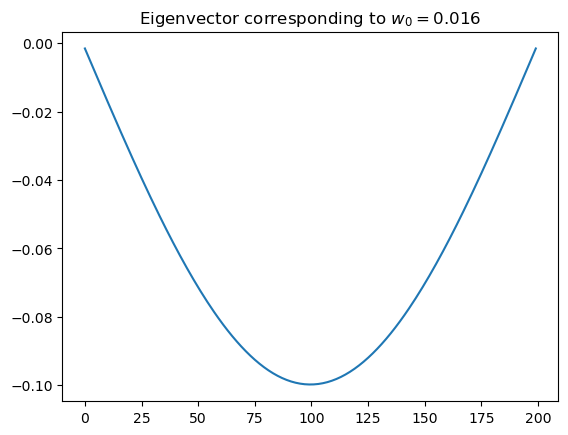

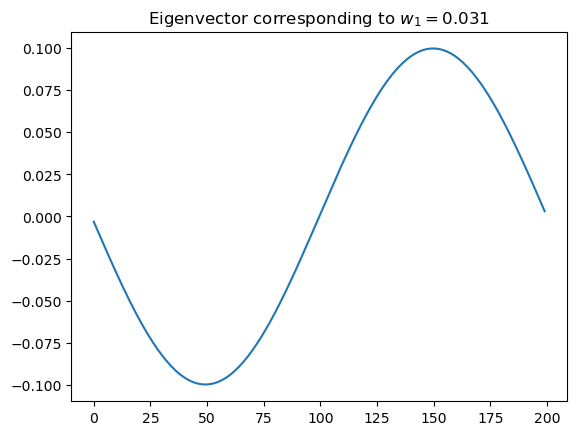

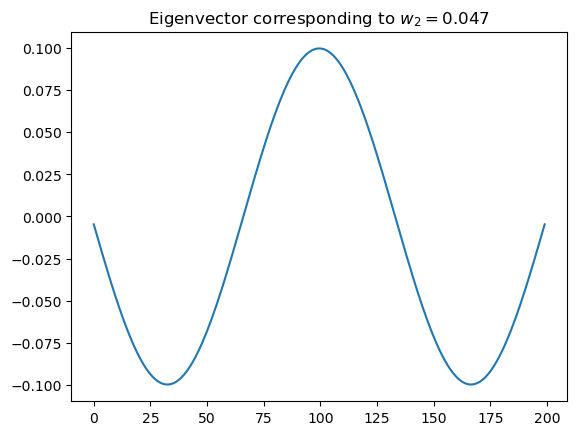

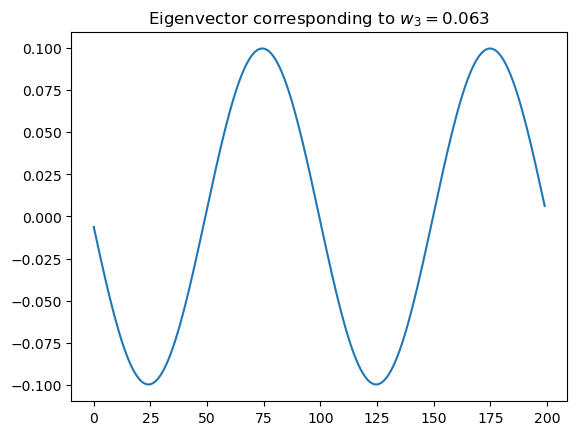

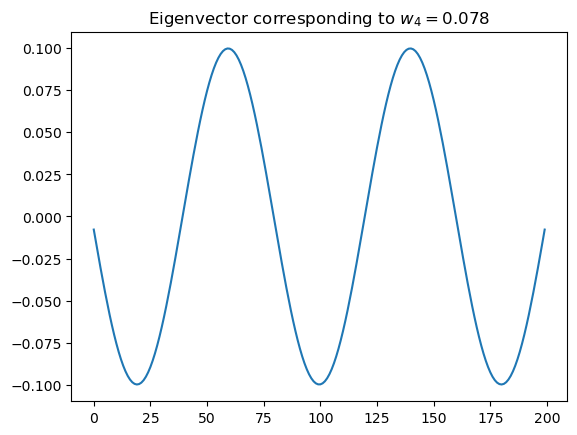

In [111]:
for i,val in enumerate(val1_low5freq):
    plt.figure()
    plt.plot(vec1_low5freq[:, i])
    plt.title('Eigenvector corresponding to $w_{} = {}$'.format(i, np.round(val,3)))


Recall that you assumed the solution of the ODE was given as $ y(t) = A \cos(wt) $. Do you think your obtained results are reasonable?

## 1.2) Supported bridge using pillars

For the pillar-supported bridge model, we add extra springs to some of the $N$ masses to help simulate the effect of pillars.


<img src="Pillar.png" width=700></img>

These springs are "grounded" in one end, meaning that the change in length in these springs is solely given by the transverse displacement $y_i$ of each mass $m_i$. Considering that each of these pillars are modeled using springs with stiffness $p_i$, the equation of motion is modified to become:

$$ - \frac{m}{k} w^2 y_i  + (2\,y_i - y_{i+1} - y_{i-1} + \frac{p_i}{k} y_i) = 0 $$

Assume that the stiffness of the support springs are given as:

$p_i = 0.05 k$ if there is a pillar connected to mass $i$ 

$p_i = 0$ otherwise.

The $i$ positions where a mass is connected to a support spring are given in the variable `pillar_positions`:

In [112]:
pillar_positions = np.array([]).astype(int)
l = N//16
for base_idx in [N//4, N//2, 7*N//8]:
    pillar_positions = np.append(pillar_positions, np.arange(base_idx-l//2,base_idx+l//2))
pillar_positions

array([ 44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180])

For this example, we see that the masses from 0 to 43 are not supported, and then masses 44 to 55 have the additional support, and so on. 

Construct the matrix ${\bf B}$ for the supported bridge model that solves


$$ \lambda {\bf y} ={\bf B}{\bf y} $$

You only need to add to the existing matrix ${\bf A}$ the contributions of the support springs given by the term $\frac{p_i}{k}$ in the equation of motion. Which entries of the matrix should be modified since $\frac{p_i}{k}$ is multiplied by $y_i$? Rememeber that the contributions are just for the masses $i$ indicated by the variable `pillar_positions`.

In [118]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
B=A.copy()
for i in pillar_positions:
    B[i,i] += 0.05

Find the 5 lowest frequencies $w_i$ and store them in the 1d numpy array `val2_low5freq`. The frequencies should appear in ascending order. Find the corresponding eigenvectors and store them in the 2d numpy array `vec2_low5freq`.

In [119]:
#grade (enter your code in this cell - DO NOT DELETE THIS LINE) 
val2, vec2 = la.eig(B)
m2=np.sqrt(val2)
mins2 = np.sort(m2)    
val2_low5freq = np.array([mins2[i] for i in range(5)])
vec2_low5freq=vec2.T[np.argsort(m2)][:5].T


Plot the eigenvectors corresponding to the lowest frequencies:

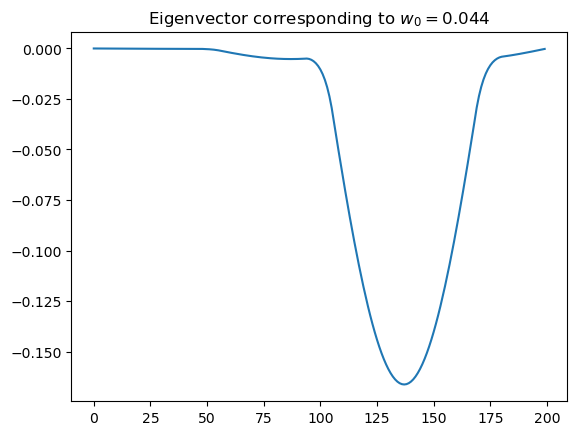

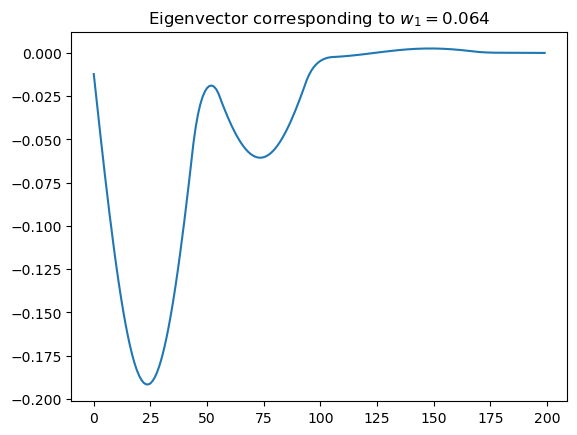

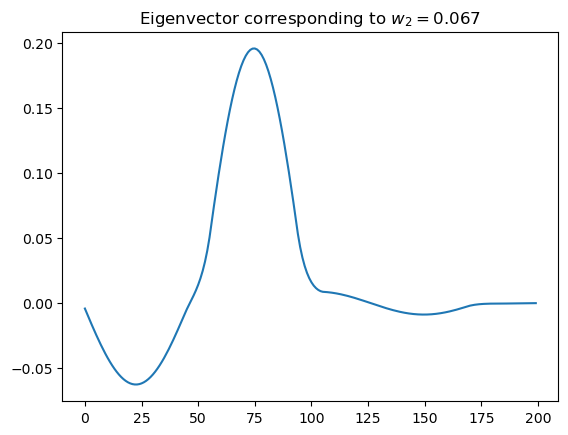

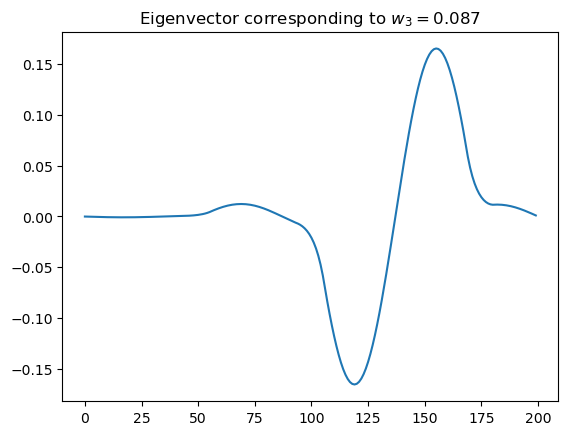

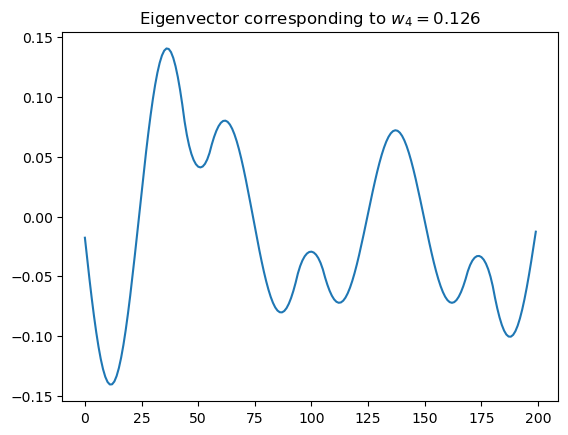

In [120]:
for i,val in enumerate(val2_low5freq):
    plt.figure()
    plt.plot(vec2_low5freq[:, i])
    plt.title('Eigenvector corresponding to $w_{} = {}$'.format(i, np.round(val,3)))